<a href="https://colab.research.google.com/github/fdafadf/ml/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.mathjax.org/

# Regresja liniowa

In [9]:
%rm -rf ml
!git clone https://github.com/fdafadf/ml

Cloning into 'ml'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ml.tutorial as tutorial

Poniższa zmienna `data` opisuje przykładowy zbiór danych zaobserwowanych. Każdy element tego zbioru to dwuelementowana tablica w której pierwszy element to wartość objaśniająca $x_i$, a drugi element to wartość objaśniana $y_i$. Przykładowo `0.1` to wartość objaśniająca $x_1$, a `0.5` zaobserwowana dla niej wartość objaśniana $y_1$.

In [4]:
data = np.array([
    [0.1, 0.5],
    [0.2, 0.3],
    [0.3, 0.6],
    [0.5, 0.4],
    [0.6, 0.3],
    [0.9, 0.7],
])

Niech poniższa prosta koloru niebieskiego, to prosta przy użyciu której staramy się przewidzieć wartości obserwowane $y_i$ na podstawie $x_i$. Rzeczywiście przewidziana wartość dla $x_i$ to $\hat{y}_i$.

Na wykresie punkty od $y_0$ do $y_n$ to wartości obserwowane dla wartości objaśniających $x_0$ do $x_n$. 

Punkty od $\hat{y}_0$ do $\hat{y}_n$ to kolejne wartości objaśniane przewidziane przez prostą, dla tych samych wartości objaśniających $x_0$ do $x_n$. 

Możemy policzyć błąd objaśniania dla dowolnej prostej, jest nim suma kwadratów długości czerwonych odcinków, czyli $ \sum_{i=1}^{n} (y_i−\hat{y}_i)^2 $.

Szukamy takiej prostej, dla której suma błędów jest jak najmniejsza: $ min \sum_{i=1}^{n} (y_i−\hat{y}_i)^2 $.

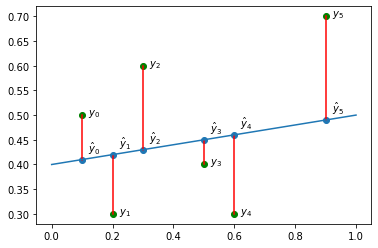

In [3]:
tutorial.show_linear_regresion_error_lines(data)

# Nowa sekcja

In [ ]:
data_set_1 = np.array([
    [0.1, 0.5],
    [0.2, 0.3],
    [0.3, 0.6],
    [0.5, 0.4],
    [0.6, 0.3],
    [0.9, 0.7],
])
data_set_2 = np.array([
    [0.1, 0.9],
    [0.2, 0.8],
    [0.5, 0.5],
    [0.6, 0.3],
    [0.8, 0.2],
    [0.9, 0.1],
])
data_sets = [data_set_1, data_set_2]

$ min \sum_{i=1}^{n} (y_i−\hat{y}_i)^2 $

$ a = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^{n} (x_i - \overline{x})^2} $

$ b = \overline{y} - a \overline{x} $



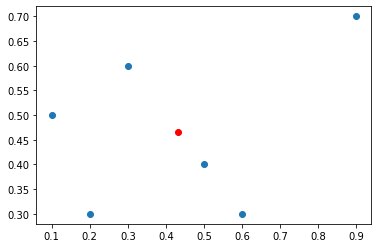

In [90]:
data = data_set_1
x_mean = data[:, 0].mean()
y_mean = data[:, 1].mean()
x, y = data.T
plt.scatter(x, y)
plt.scatter([x_mean], [y_mean], color='red')
plt.show()

trivial_1 error: 0.1333333333333333
0.1333333333333333
trivial_2 error: 0.13795555555555553
least_squares error: 0.11599999999999999
least_qubics error: 0.11599999999999999


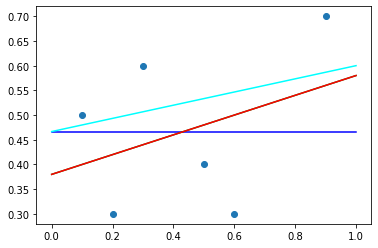

trivial_1 error: 0.5333333333333334
0.5333333333333334
trivial_2 error: 1.684622222222223
least_squares error: 0.00819672131147543
least_qubics error: 0.00819672131147543


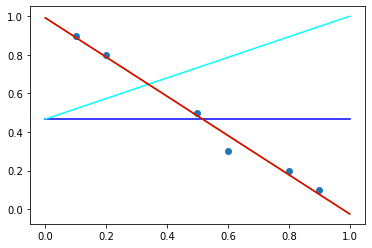

In [8]:
def print_error(a, b, data, name):
  error = sum(d * d for d in [(a * item[0] + b) - item[1] for item in data]) 
  print(name + ' error: ' + str(error))

def draw_line(a, b, color):
  plt.plot([0, 1], [b, a + b], color=color)

def trivial_1(data):
  return 0, data[:, 1].mean()

def trivial_2(data):
  y_mean = data[:, 1].mean()
  a = sum([d * d for d in [item[1] - y_mean for item in data]])
  print(a)
  return a, data[:, 1].mean()

def least_squares(data):
  x_mean = data[:, 0].mean()
  y_mean = data[:, 1].mean()
  x_diffs = [a[0] - x_mean for a in data]
  y_diffs = [a[1] - y_mean for a in data]
  x_squares = [a * a for a in x_diffs]
  a = sum([a[0] * a[1] for a in zip(x_diffs, y_diffs)]) / sum(x_squares)
  b = y_mean - a * x_mean
  return a, b

def least_qubics(data):
  x_mean = data[:, 0].mean()
  y_mean = data[:, 1].mean()
  x_diffs = [a[0] - x_mean for a in data]
  y_diffs = [a[1] - y_mean for a in data]
  x_qubics = [a * a for a in x_diffs]
  a = sum([a[0] * a[1] for a in zip(x_diffs, y_diffs)]) / sum(x_qubics)
  b = y_mean - a * x_mean
  return a, b

def case(fun, data, color):
  line = fun(data)
  print_error(*line, data, fun.__qualname__)
  draw_line(*line, color)

for data in data_sets:
  x, y = data.T
  plt.scatter(x, y)
  case(trivial_1, data, 'blue')
  case(trivial_2, data, 'cyan')
  case(least_squares, data, 'green')
  case(least_qubics, data, 'red')
  plt.show()
